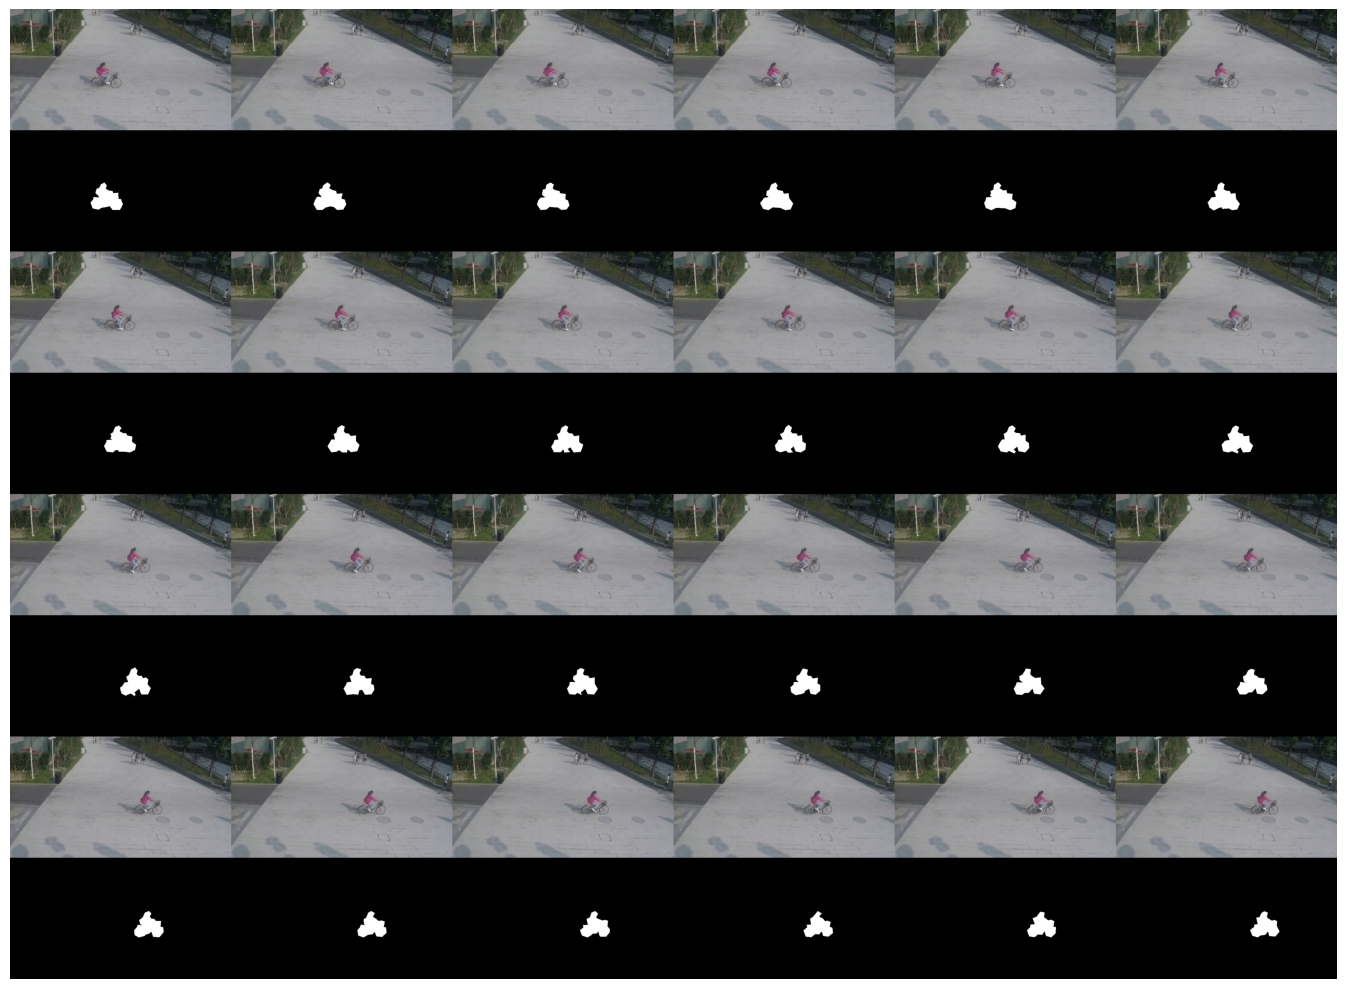

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 配置
file_id = '01_0029-180_203'
video_path = os.path.join('../dataset/train', f'{file_id}.mp4')
mask_path = os.path.join('../dataset/gt', f'{file_id}.npy')

# 读取视频帧
cap = cv2.VideoCapture(video_path)
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
cap.release()
frames = np.array(frames)  # T, H, W, 3

# 读取mask
masks = np.load(mask_path)  # T, H, W

# 保证帧数一致且只取24帧
T = min(24, len(frames), len(masks))
frames = frames[:T]
masks = masks[:T]

# 将mask转成可视化三通道
def mask2color(mask):
    if mask.max() <= 1:
        mask = (mask * 255).astype(np.uint8)
    return np.stack([mask, mask, mask], axis=-1)

mask_imgs = np.array([mask2color(m) for m in masks])

# 每个帧和mask纵向拼接成单元格
cells = [np.vstack([f, m]) for f, m in zip(frames, mask_imgs)]

# 组装成4行6列
rows = []
for i in range(4):
    row_cells = cells[i*6:(i+1)*6]
    row = np.hstack(row_cells)
    rows.append(row)

final_img = np.vstack(rows)

plt.figure(figsize=(18, 10))
plt.imshow(final_img)
plt.axis('off')
plt.tight_layout()
plt.show()
